

## GOAL: Create a model to predict whether or not a customer will Churn .


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%cd '/content/drive/MyDrive/Machine Learning Course /Trees Project'

/content/drive/MyDrive/Machine Learning Course /Trees Project


In [ ]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [ ]:
df.head()

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95      1889.50     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

## Quick Data Check


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

## Exploratory Data Analysis

### General Feature Exploration


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Graphs

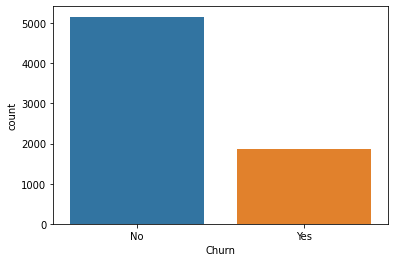

In [ ]:
sns.countplot(data=df,x='Churn');

<img src='https://drive.google.com/uc?export=view&id=1ZldojE-Vi0cF2RdJuU8pr_IBte01z0u6' >


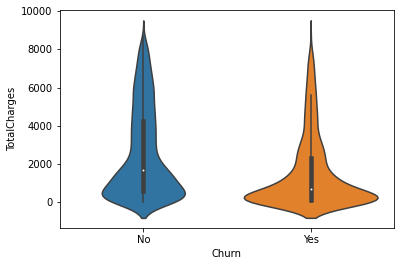

In [ ]:
sns.violinplot(data=df,x='Churn', y='TotalCharges',)

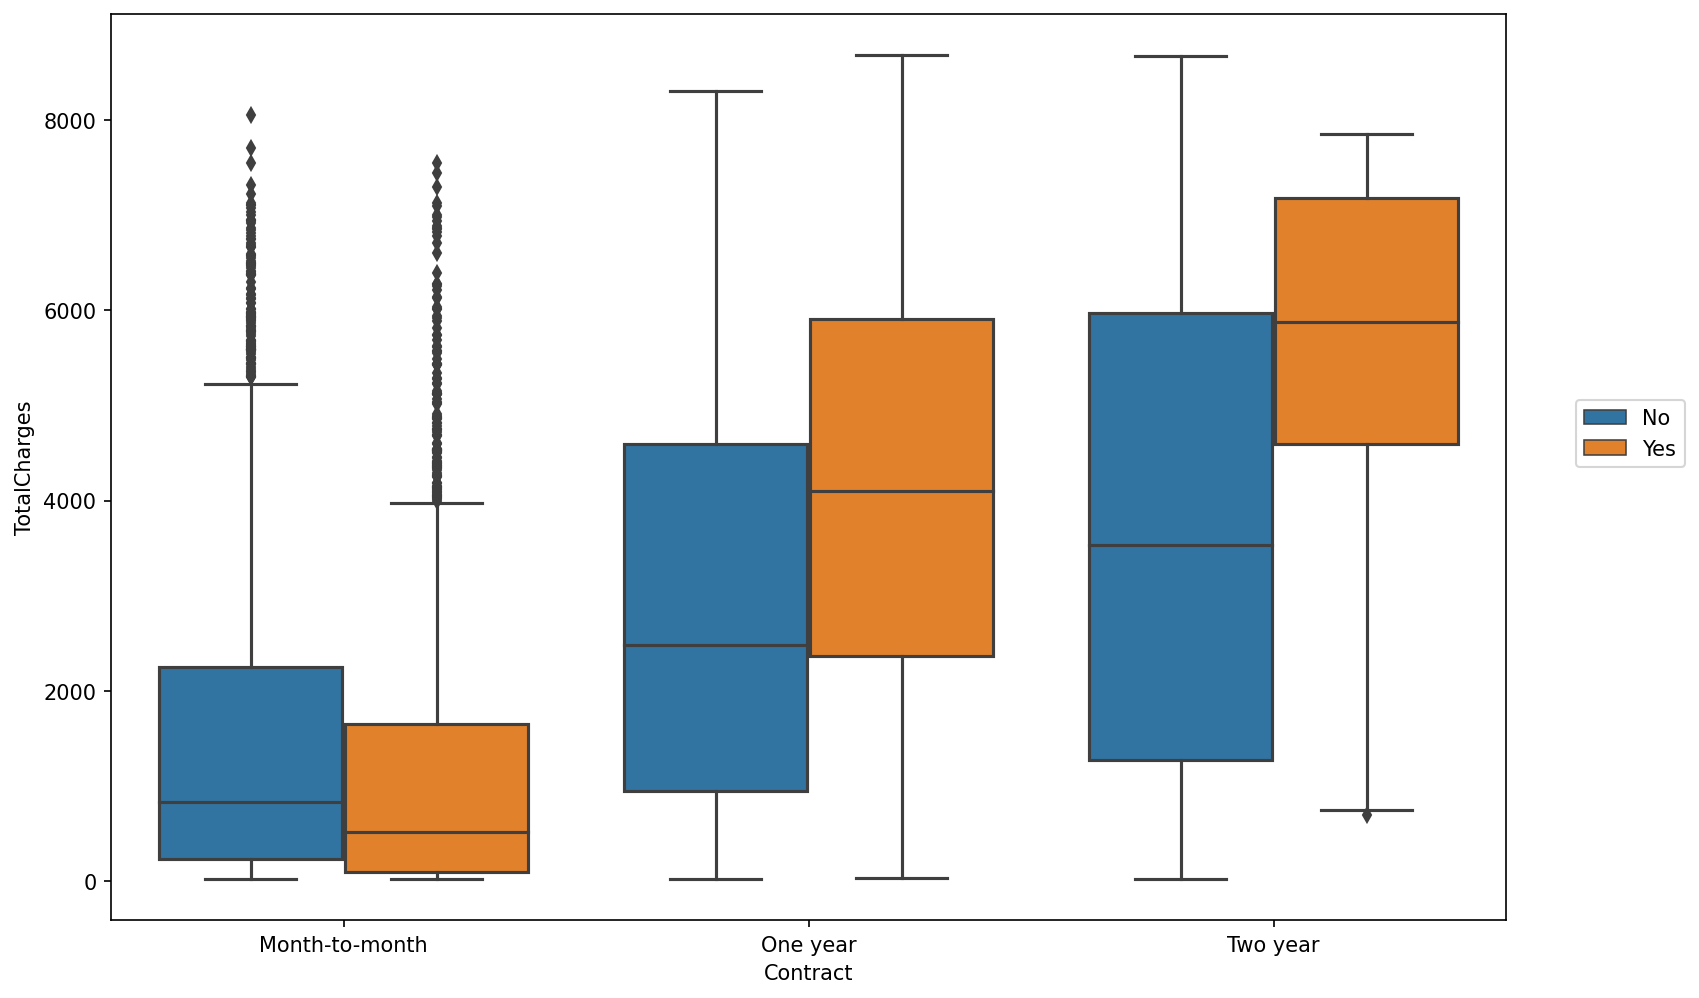

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
sns.boxplot(data=df, x='Contract', y='TotalCharges',hue='Churn');
plt.legend(loc=(1.05,0.5));

<img src='https://drive.google.com/uc?export=view&id=1af0aNWVCojEWLvcVxEMvT0o4QhjtZiXA' >

In [ ]:
dummies = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']])

In [ ]:
dummies.columns

Index(['SeniorCitizen', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'InternetService_Fiber optic', 'InternetService_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [ ]:
plot = dummies.corr()['Churn_Yes'].sort_values()[1:-1]
plot

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

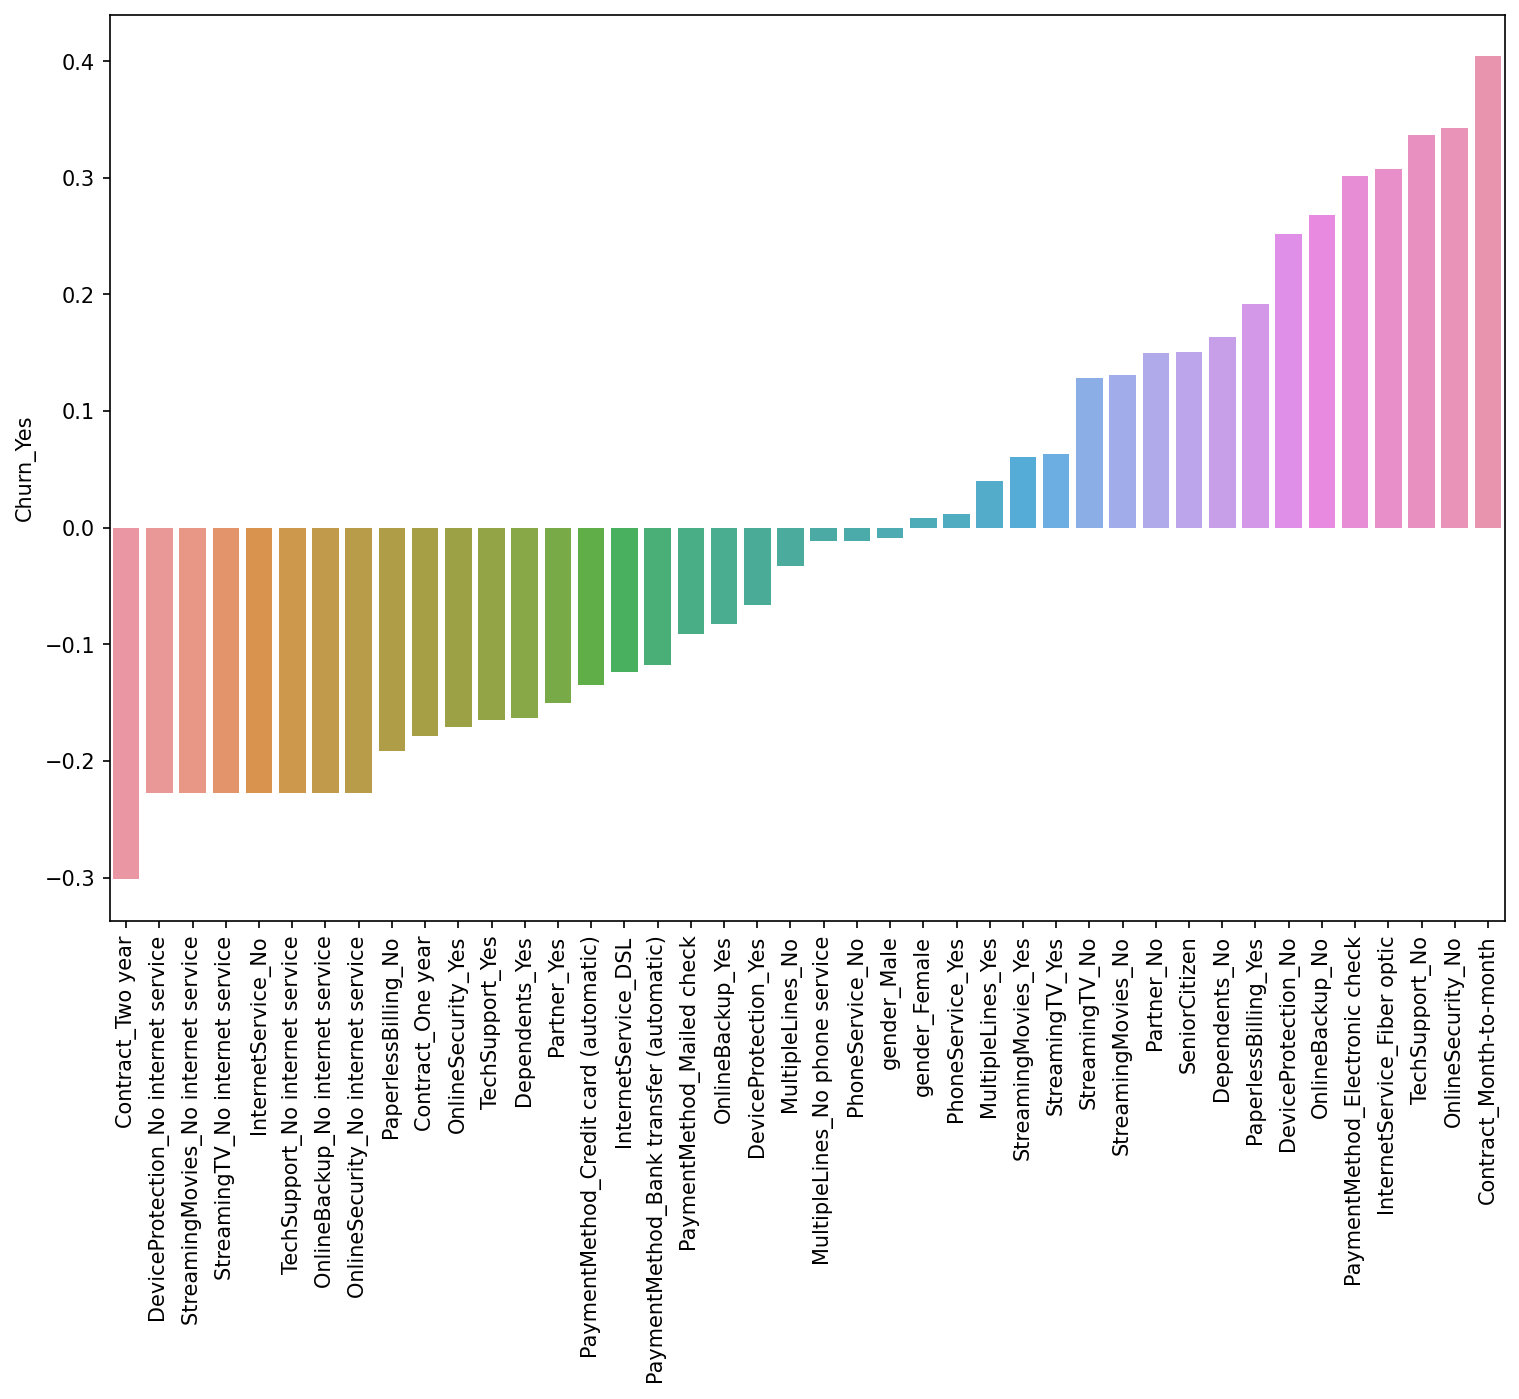

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
sns.barplot(x=plot.index,y=plot);
plt.xticks(rotation=90);

---
---

## Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

In [ ]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

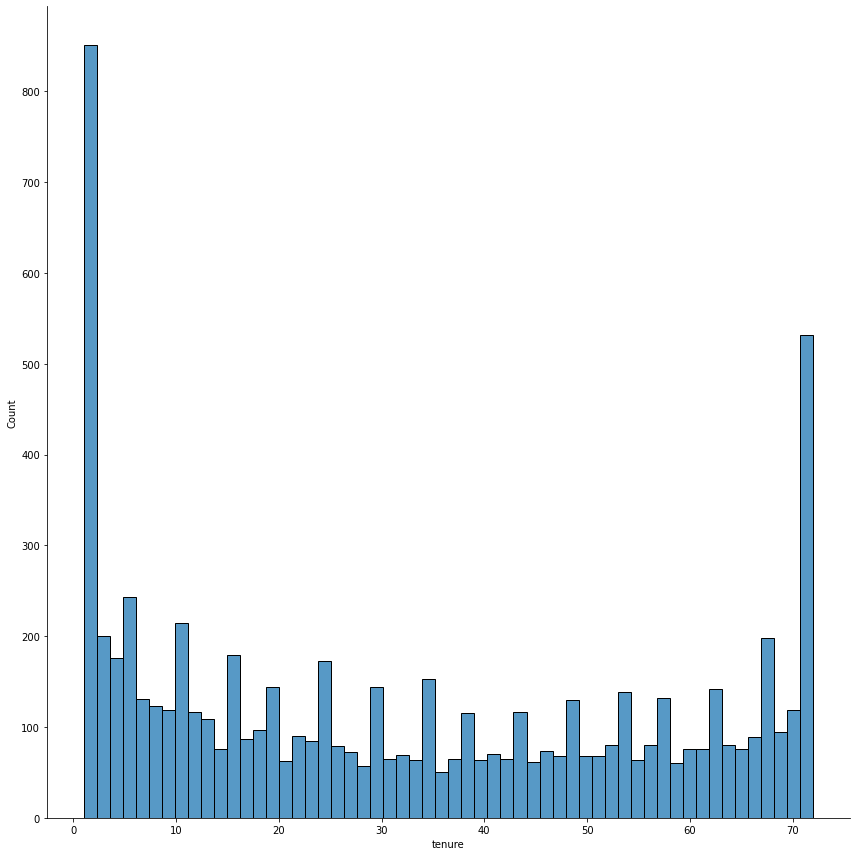

In [ ]:
sns.displot(data=df, x='tenure',bins=56,height=12);

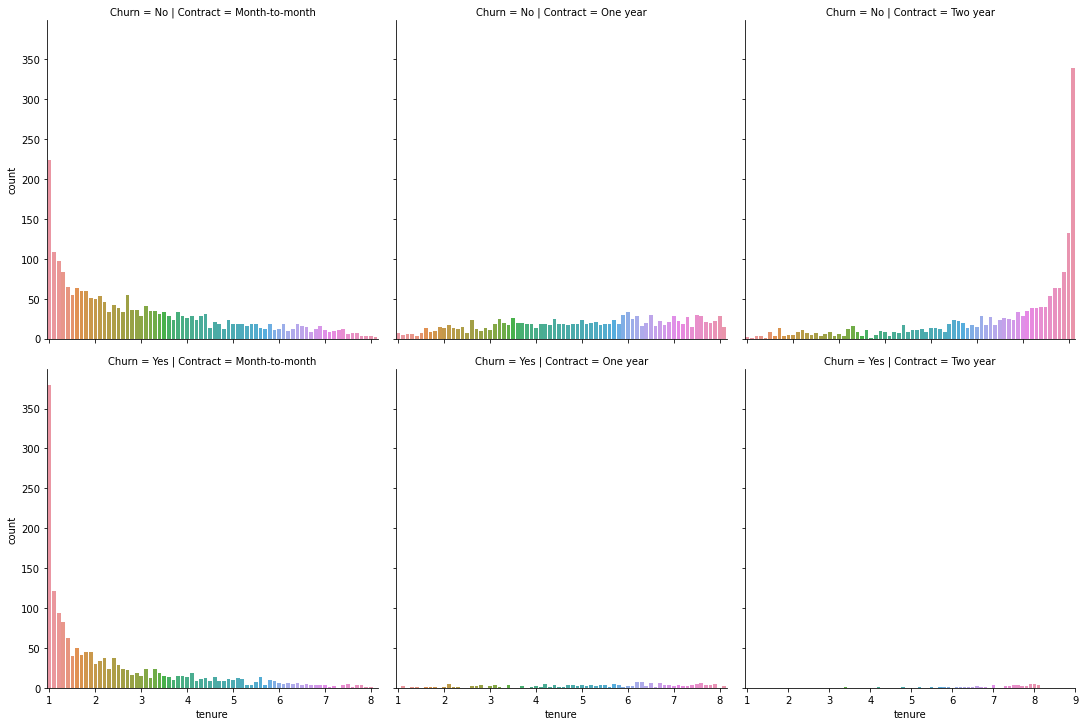

In [ ]:
vals = []
number = np.arange(0,90,10)

for x in number:
  vals.append(x)
vals

sns.catplot(data=df, x='tenure', col='Contract',row='Churn', kind='count');
plt.xticks(vals);

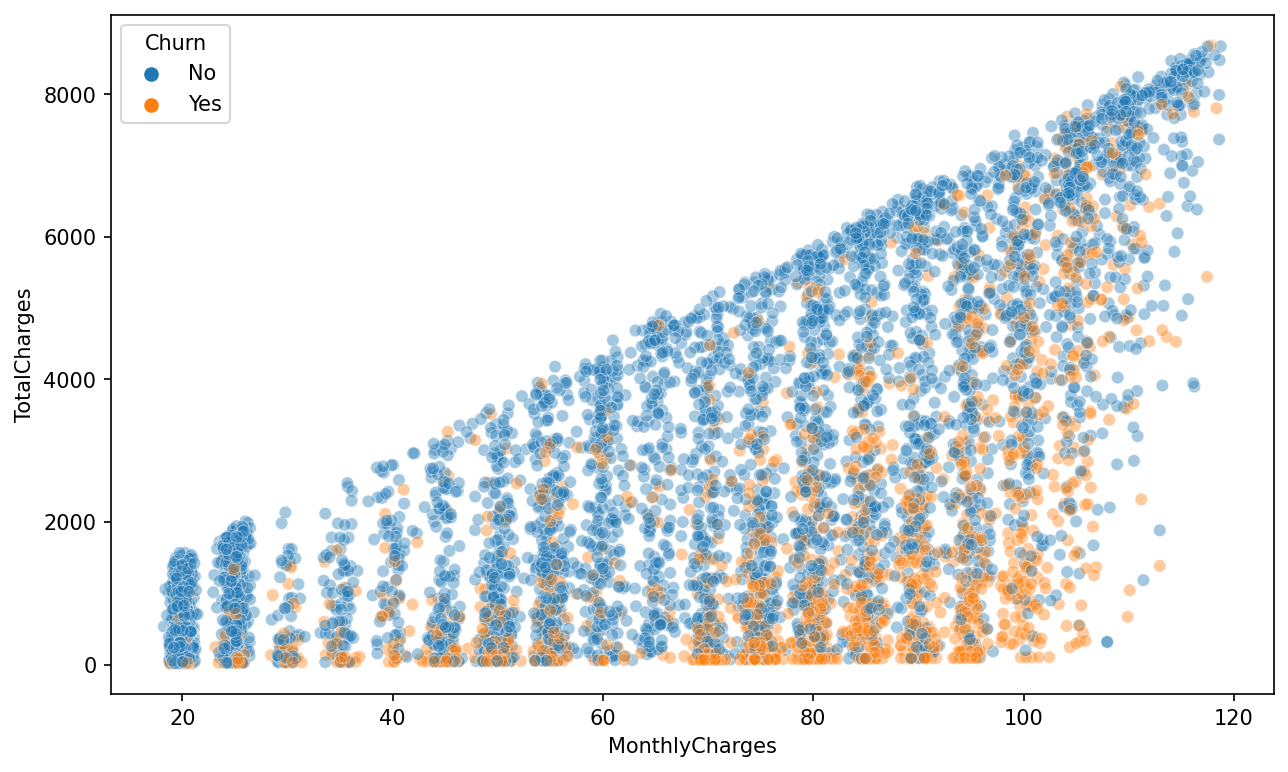

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(data=df, hue='Churn',x='MonthlyCharges',y='TotalCharges',alpha=0.4);

In [ ]:
#CODE HERE
tenure = []
for i in range(1,73):
  value = 100*df['Churn'][(df.tenure == i)& (df.Churn=='Yes')].count()/df['Churn'][(df.tenure == i)].count()
  tenure.append(value)

In [ ]:
ten = pd.DataFrame(tenure)

In [ ]:
ten.index +=1

In [ ]:
ten.columns = ['Tenure']

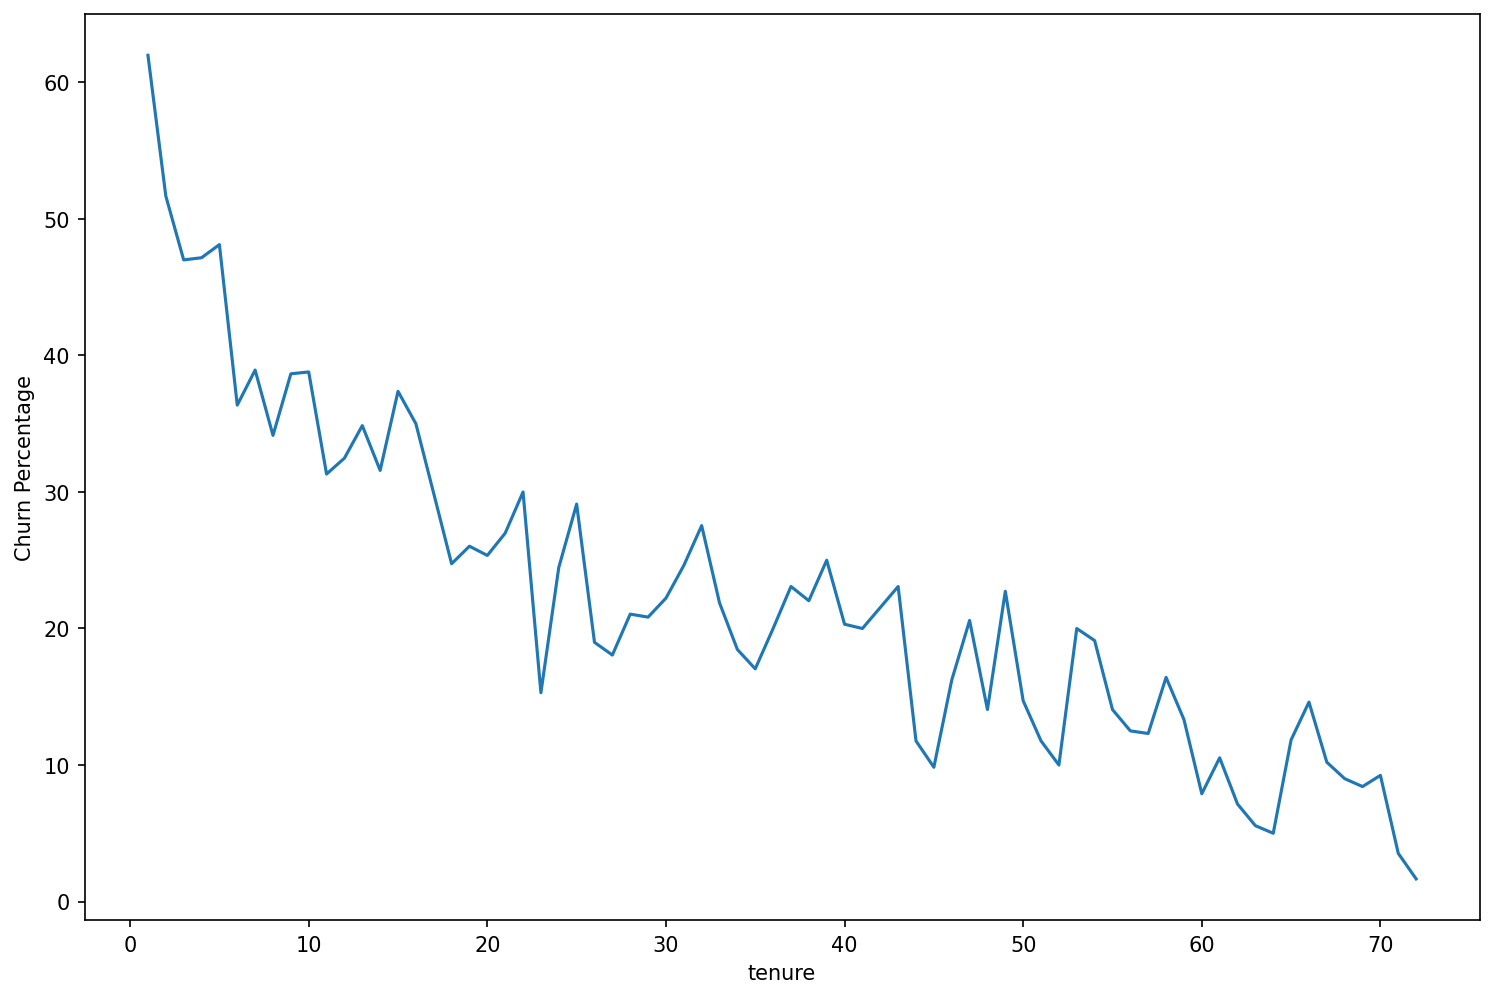

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
plt.plot(ten.index, ten);
plt.xlabel('tenure')
plt.ylabel('Churn Percentage');

### Broader Cohort Groups

   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [ ]:
# CODE HERE
def tenure_cohort(x):
  if x>=1 and x<12:
    return '0-12 Months'
  elif x<24:
    return '12-24 Months'
  elif x<48:
    return '24-48 Months'
  else:
    return 'Over 48 Months'

In [ ]:
df['Tenure Cohort'] = np.vectorize(tenure_cohort)(df.tenure)

In [ ]:
df[['tenure','Tenure Cohort']].head(10)

tenure   Tenure Cohort
0       1     0-12 Months
1      34    24-48 Months
2       2     0-12 Months
3      45    24-48 Months
4       2     0-12 Months
5       8     0-12 Months
6      22    12-24 Months
7      10     0-12 Months
8      28    24-48 Months
9      62  Over 48 Months

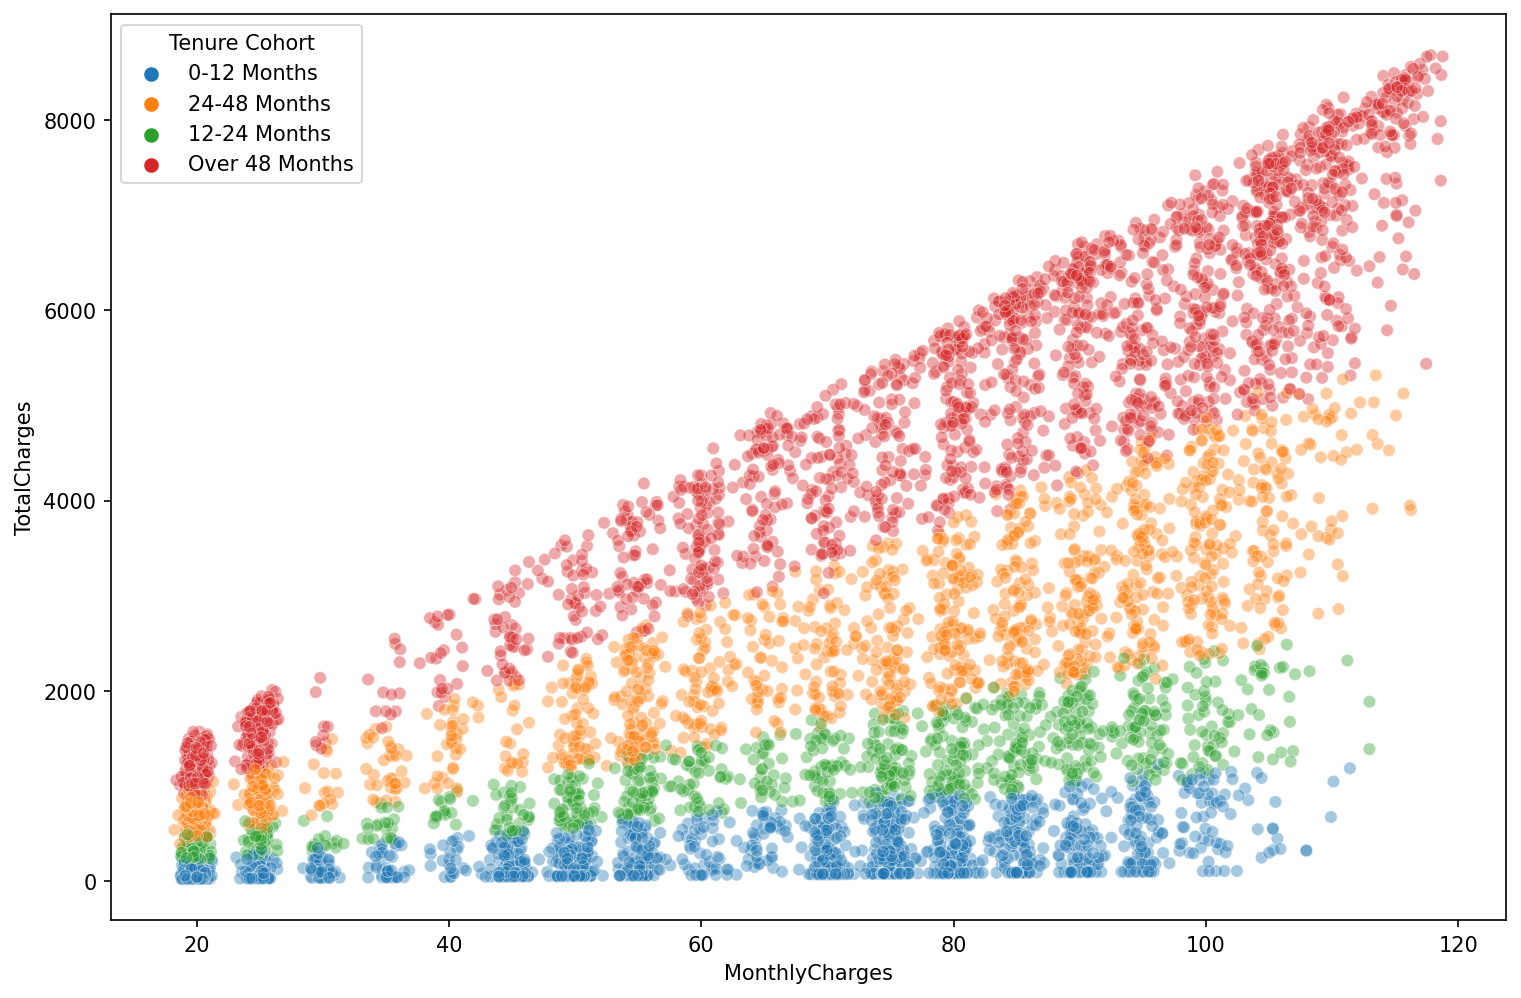

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges',hue='Tenure Cohort',alpha=0.4);

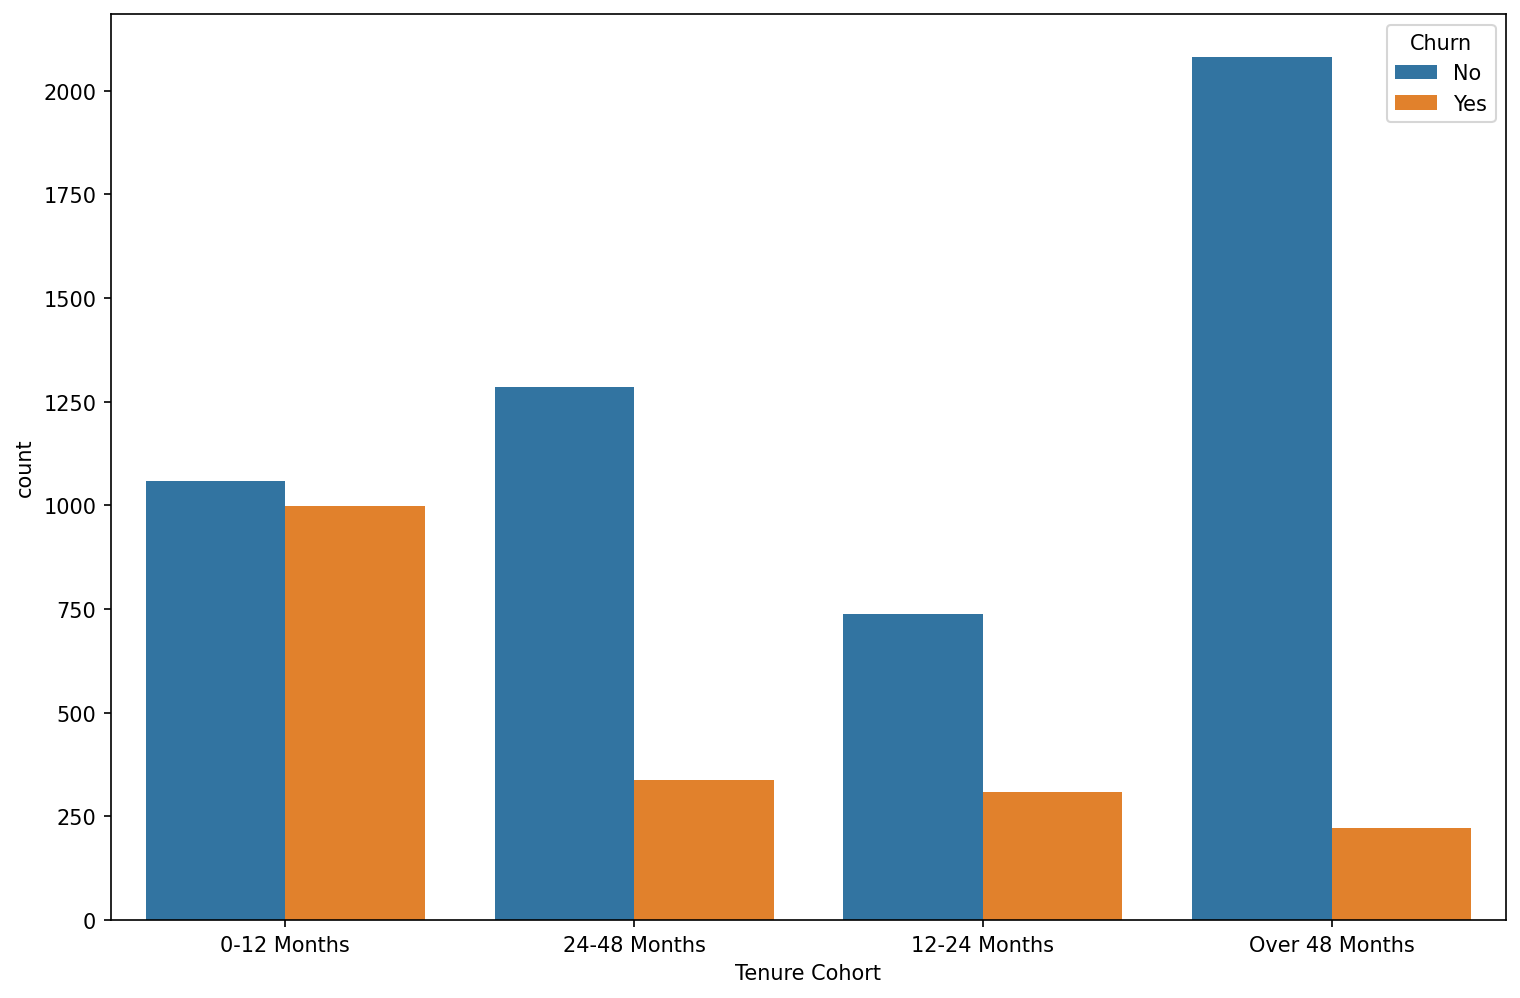

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn');

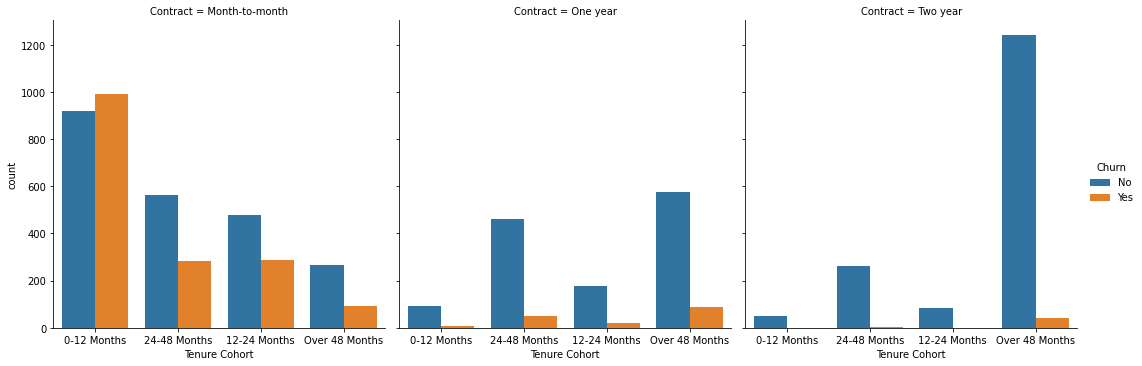

In [ ]:
sns.catplot(x='Tenure Cohort', col='Contract',hue='Churn',data=df , kind='count');

-----

## Predictive Modeling



## Single Decision Tree

In [ ]:
df.columns
X = df.drop(['Churn','customerID'], axis=1)
X = pd.get_dummies(X,drop_first=True)
X

SeniorCitizen  ...  PaymentMethod_Mailed check
0                 0  ...                           0
1                 0  ...                           1
2                 0  ...                           1
3                 0  ...                           0
4                 0  ...                           0
...             ...  ...                         ...
7027              0  ...                           1
7028              0  ...                           0
7029              0  ...                           0
7030              1  ...                           1
7031              0  ...                           0

[7032 rows x 30 columns]

In [ ]:
df.head()

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95      1889.50     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd 

X_2 = df.drop(['Churn','customerID'], axis=1)

X_2_num = df[['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']]
X_2_cat = X_2.drop(X_2_num,axis=1)

encoder = OneHotEncoder(drop='first', 
                        sparse = False
                        )

data = pd.DataFrame(encoder.fit_transform(X_2_cat))
data.columns = list(encoder.get_feature_names())

#print(data.columns)

X = X_2_num.join(data)
X

tenure  MonthlyCharges  ...  x14_Electronic check  x14_Mailed check
0          1           29.85  ...                   1.0               0.0
1         34           56.95  ...                   0.0               1.0
2          2           53.85  ...                   0.0               1.0
3         45           42.30  ...                   0.0               0.0
4          2           70.70  ...                   1.0               0.0
...      ...             ...  ...                   ...               ...
7027      24           84.80  ...                   0.0               1.0
7028      72          103.20  ...                   0.0               0.0
7029      11           29.60  ...                   1.0               0.0
7030       4           74.40  ...                   0.0               1.0
7031      66          105.65  ...                   0.0               0.0

[7032 rows x 30 columns]

In [ ]:
joblib.dump(encoder, './Production/encoder.pkl')
joblib.dump(data.columns, './Production/variables_names.pkl')

['./Production/variables_names.pkl']

In [ ]:
# encoder.transform(df[1:-1].drop(['tenure','MonthlyCharges','TotalCharges'],axis=1))
pd.DataFrame(encoder.transform(df.drop(['customerID','Churn','tenure','MonthlyCharges','TotalCharges'], axis=1)),columns=data.columns)

x0_Male  x1_1  ...  x15_Electronic check  x15_Mailed check
0         0.0   0.0  ...                   1.0               0.0
1         1.0   0.0  ...                   0.0               1.0
2         1.0   0.0  ...                   0.0               1.0
3         1.0   0.0  ...                   0.0               0.0
4         0.0   0.0  ...                   1.0               0.0
...       ...   ...  ...                   ...               ...
7027      1.0   0.0  ...                   0.0               1.0
7028      0.0   0.0  ...                   0.0               0.0
7029      0.0   0.0  ...                   1.0               0.0
7030      1.0   1.0  ...                   0.0               1.0
7031      1.0   0.0  ...                   0.0               0.0

[7032 rows x 27 columns]

In [ ]:
y = df.Churn
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_grid_param = {'criterion':["gini", "entropy"], 
                   'splitter':["best", "random"], 
                   'max_depth':[4,5,10,20,50]}
grid_model = GridSearchCV(tree_model,param_grid=tree_grid_param,cv=10)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [ ]:
grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}

In [ ]:
tree_preds = grid_model.predict(X_test)

In [ ]:
print(classification_report(y_test,tree_preds))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



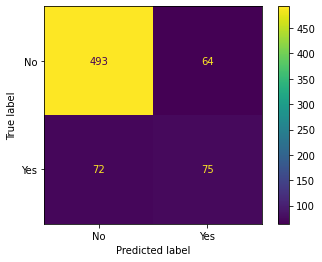

In [ ]:
plot_confusion_matrix(grid_model,X_test,y_test,values_format="");

In [ ]:
feat = pd.DataFrame(data=grid_model.best_estimator_.feature_importances_, columns=['Feature Importance'], index=X.columns)

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
sns.barplot(x = feat.index, y=feat['Feature Importance'].sort_values());
plt.xticks(rotation=90);

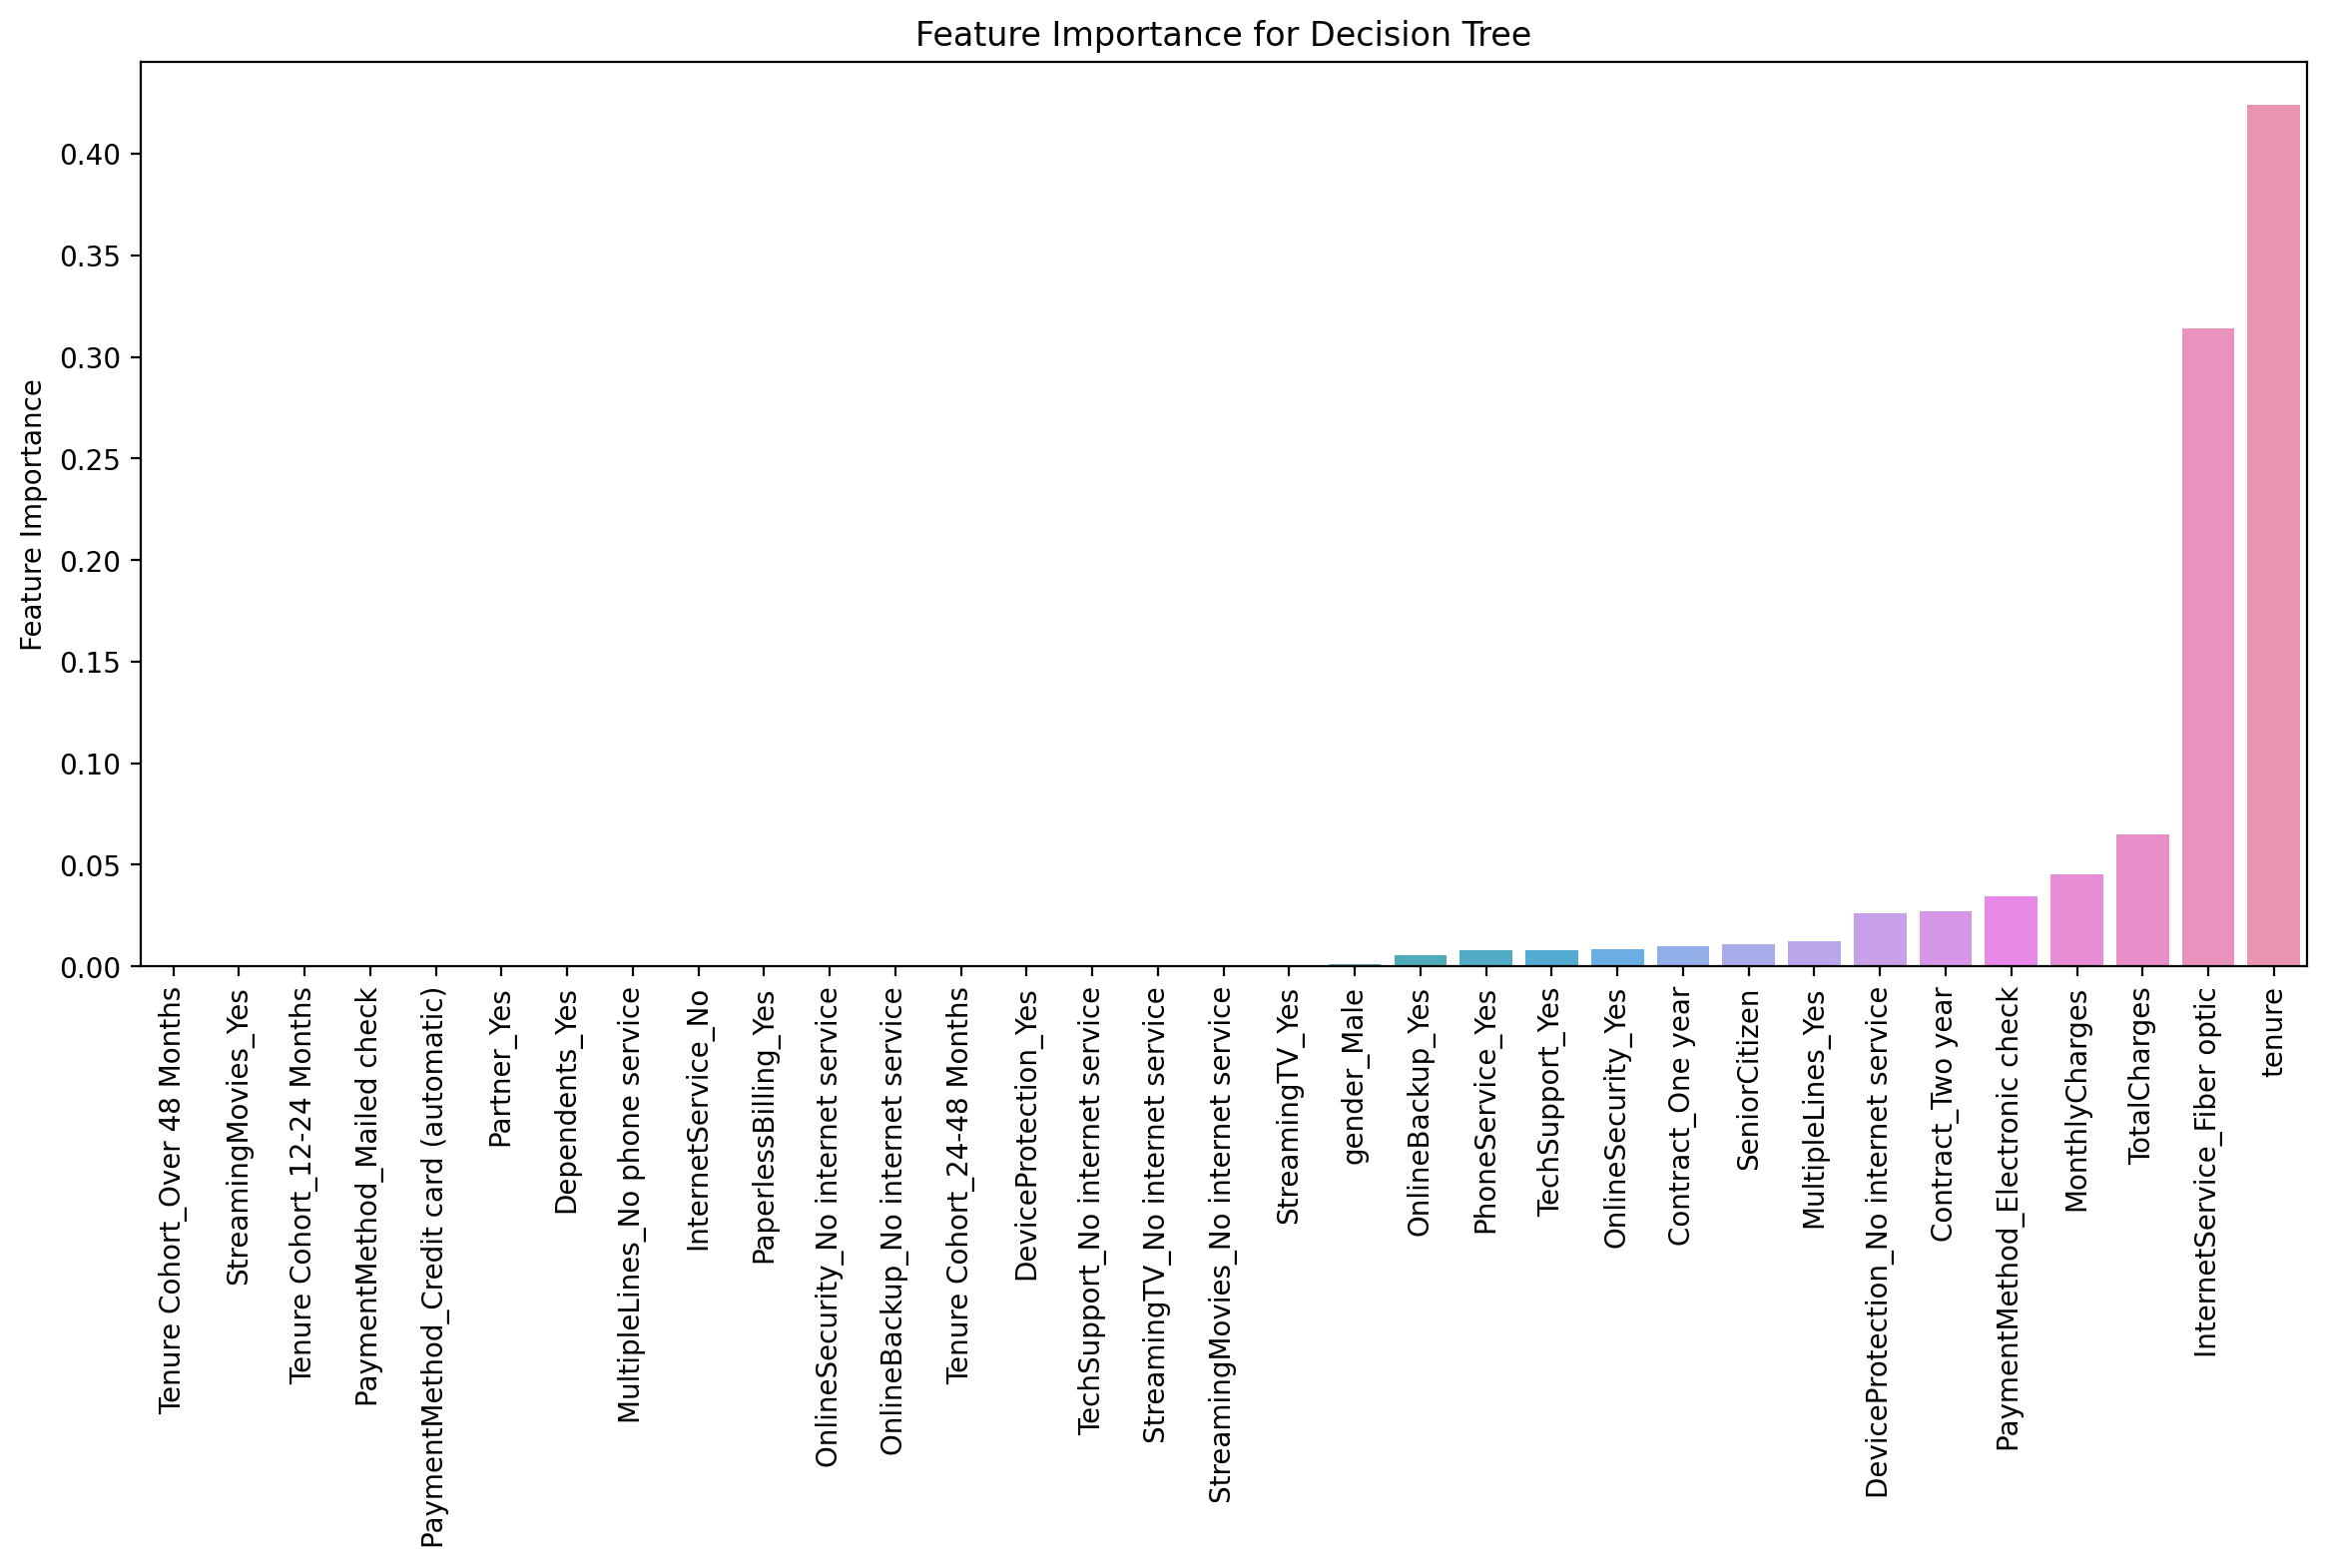

## Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
rf_preds = model.predict(X_test)

In [ ]:
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.49      0.44      0.46       147

    accuracy                           0.79       704
   macro avg       0.67      0.66      0.66       704
weighted avg       0.78      0.79      0.78       704



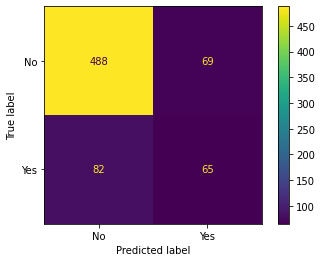

In [ ]:
plot_confusion_matrix(model,X_test,y_test,values_format="");

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)
ada_preds = ada_model.predict(X_test)

In [ ]:
probas = ada_model.predict_proba(X_test)
pd.DataFrame(probas)[0].nlargest(3)

671    0.601786
20     0.531778
158    0.531257
Name: 0, dtype: float64

In [ ]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



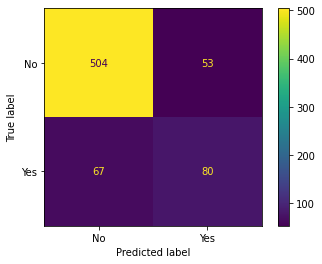

In [ ]:
plot_confusion_matrix(ada_model,X_test,y_test,values_format="");

In [ ]:
joblib.dump(ada_model, './Production/model.pkl')

['./Production/model.pkl']

In [ ]:
import joblib
telco_costumer_model = joblib.load('./Production/model.pkl')
telco_costumer_encoder = joblib.load('./Production/encoder.pkl')
telco_costumer_variables_names = joblib.load('./Production/variables_names.pkl')

In [ ]:
feature_data = [{"gender":"Male","SeniorCitizen":1,"Partner":"Yes","Dependents":"Yes","tenure":72,"PhoneService":"Yes","MultipleLines":"Yes","InternetService":"Fiber optic","OnlineSecurity":"Yes","OnlineBackup":"Yes","DeviceProtection":"Yes","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"Yes","Contract":"Two year","PaperlessBilling":"Yes","PaymentMethod":"Bank transfer (automatic)","MonthlyCharges":114.95,"TotalCharges":8196.4}]
feature_data2 = [{'gender': 'Male', 'SeniorCitizen': '1', 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': '72', 'PhoneService': 'Yes', 'MultipleLines': 'Yes', 'InternetService': 'Fiber optic', 'OnlineSecurity': 'Yes', 'OnlineBackup': 'Yes', 'DeviceProtection': 'Yes', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes', 'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Bank transfer (automatic)', 'MonthlyCharges': '114.95', 'TotalCharges': '8196.4'}]

In [ ]:
telco_costumer_model = joblib.load('./Production/model.pickle')
telco_costumer_encoder = joblib.load('./Production/encoder.pkl')
telco_costumer_variables_names = ('./Production/variables_names.pkl')

df = pd.DataFrame(feature_data)
#df = df.reindex(columns= telco_costumer_variables_names)

# # PREDICT ON RESULTS
df_num = df[['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']].astype(float)
df_cat = df.drop(df_num.columns,axis=1)


final_data = pd.DataFrame(telco_costumer_encoder.transform(df_cat))
final_data.columns = list(telco_costumer_encoder.get_feature_names())

input_with_dummy = df_num.join(final_data)
prediction = telco_costumer_model.predict_proba(input_with_dummy)
prediction

array([[0.60178629, 0.39821371]])